<p style="font-family:Times New Roman; font-size:120%">
    -Aleksander Nistad Sekkelsten
</p>
<h1 style="font-family:Times New Roman; font-size: 300%"><center> Project 2 - Frankes function analysis</center></h1>

<p style="font-family:Times New Roman; font-size:120%">
    Here, I use the optimization algorithms Gradient Descent, Stochastic Gradient Descent, Momentum, AdaGrad, RMSProp and ADAM on Franke's function. I compare various gradient calculation schemes, including analytical and zygote gradients. I also compare ridge and OLS regression for both. 
</p>

In [13]:
import Pkg; Pkg.activate(".julia/environments/v1.10/Project.toml")
Pkg.add(["SCS", "Convex","PlotThemes","Images"])
using Plots, Random, NBInclude, LinearAlgebra, Statistics, Distributions, Convex, SCS, Zygote
using Plots.PlotMeasures
using StatsBase: sample
theme(:dao)
@nbinclude("/Users/aleksandersekkelsten/Downloads/Project 1 function.ipynb")
@nbinclude("FYS-STK 4155 Project 2 Methods .ipynb")

  Activating project at `~/.julia/environments/v1.10`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


ADAM! (generic function with 1 method)

In [14]:
#X and Y range
X = range(0,1,100) |> collect 
Y = range(0,1,100) |> collect

Random.seed!(123)
ϵ=Normal(0, 0.02) # Noise with σ=0.02
Z = Franke.(X',Y) .+ rand(ϵ,(100,100)) #Finding Z values

#Display Frankes funciton
surface(X,Y,Z, size=(1000,700),title="Franke's function")

In [ ]:
function RegressionGradient(Method, theta, X, zb, batch_size;λ=1e-5)
    #Calculates the derivatives of linear regression for OLS or Ridge regression
    if Method=="OLS"
        grads = (2/batch_size)*X'*(X*theta-zb)
        
    elseif Method=="Ridge"
        grads = (2/batch_size)*X'*(X*theta-zb)+2*λ*theta
    else
        @warn "Method Undefined" 
        println("Expected: OLS, Lasso or Ridge, but got: ", Method)
        return
    end
    return grads
end

RegressionGradient (generic function with 1 method)

In [16]:
#HyperParameters
degrees = 5
η = 0.001
λ = 0 #OLS = 0, Ridge ≠ 0
batch_size = 80
epochs=500

    
DM,Z_flat = DataProjector(X,Y, Z, degrees,train=false) #Density matrix and flattened Z for the entire dataset
xTrain, yTrain, zTrain, xTest, yTest, zTest = SplitData2D(X,Y,Z,0.8)
batches =Int(round(length(xTrain)/batch_size))
D_M_train = DataProjector(xTrain, yTrain, zTrain, degrees) #Train DensityMatrix (for GD)
D_M_test = DataProjector(xTest, yTest, zTest, degrees) #Test Density matrix

2000×21 Matrix{Float64}:
 1.0  0.040404   0.00163249  6.5959e-5    …  0.0        0.0  0.0       0.0
 1.0  0.0505051  0.00255076  0.000128826     0.0        0.0  0.0       0.0
 1.0  0.0606061  0.00367309  0.000222612     0.0        0.0  0.0       0.0
 1.0  0.10101    0.010203    0.00103061      0.0        0.0  0.0       0.0
 1.0  0.141414   0.019998    0.00282799      0.0        0.0  0.0       0.0
 1.0  0.171717   0.0294868   0.00506339   …  0.0        0.0  0.0       0.0
 1.0  0.242424   0.0587695   0.0142472       0.0        0.0  0.0       0.0
 1.0  0.262626   0.0689726   0.018114        0.0        0.0  0.0       0.0
 1.0  0.282828   0.0799918   0.022624        0.0        0.0  0.0       0.0
 1.0  0.292929   0.0858076   0.0251356       0.0        0.0  0.0       0.0
 1.0  0.373737   0.13968     0.0522035    …  0.0        0.0  0.0       0.0
 1.0  0.383838   0.147332    0.0565516       0.0        0.0  0.0       0.0
 1.0  0.393939   0.155188    0.0611348       0.0        0.0  0.0       0.0


<h2 style="font-family:Times New Roman; font-weight:bolder; font-size:240%">Gradient Descend</h2>


In [17]:

theta=rand((degrees + 1) * (degrees + 2) ÷ 2)
for i in 1:epochs
    grad =(2/length(xTrain))*D_M_train'*(D_M_train*theta-zTrain) + 2*λ*theta #Analytical Gradient
    #grad = Zygote.gradient(theta -> MSE(D_M_train, zTrain, theta;λ=λ), theta)[1] # Zygote Gradient
    theta-= η*grad
    if i%100==0
        
        println("Epoch = ", i, "   Loss = ", MSE(D_M_test, zTest, theta; λ=0, γ=0))
    end
end
estGD = DM*theta


Epoch = 100   Loss = 4.6626521178347495
Epoch = 200   Loss = 2.2157754464931108
Epoch = 300   Loss = 1.2764837122446173
Epoch = 400   Loss = 0.8877679443681769
Epoch = 500   Loss = 0.7032021077682217


10000-element Vector{Float64}:
 -0.5056411158540304
 -0.5055177831018534
 -0.5053596204559724
 -0.5051668991628662
 -0.5049398832209767
 -0.5046788311909478
 -0.5043839980058643
 -0.5040556367814913
 -0.5036940006265131
 -0.5032993444527732
 -0.5028719267855115
 -0.5024120115736057
 -0.5019198699998088
  ⋮
  2.5165495551656
  2.5770963448477797
  2.638662860222056
  2.701258789903363
  2.764893786820918
  2.829577466407991
  2.8953194047916537
  2.9621291369825524
  3.03001615506466
  3.0989899063850403
  3.169059791743611
  3.2402351635828985

<h2 style="font-family:Times New Roman; font-weight:bolder; font-size:240%">Stochastic Gradient Descend</h2>

In [18]:


theta=rand((degrees + 1) * (degrees + 2) ÷ 2)
for i in 1:epochs
    for j in 1:batches
        a, b = Int(batch_size*(j-1)+1), Int(batch_size*(j)+1)
        if j==batches
            xb, yb, zb = xTrain[a:end], yTrain[a:end], zTrain[a:end]
        else
            xb, yb, zb = xTrain[a:b], yTrain[a:b], zTrain[a:b]
        end
        X = DataProjector(xb, yb, zb, degrees)
        grad =RegressionGradient("OLS", theta, X, zb, batch_size;λ=λ) #Anal Gradient
        #grad = Zygote.gradient(theta -> MSE(X, zb, theta;λ=λ), theta)[1] # Zygote Gradient
        theta-= η*grad
        
    end
    if i%100==0
        println("Epoch = ", i, "   Loss = ", MSE(D_M_test, zTest, theta; λ=0, γ=0))
    end
end
estSGD = DM*theta


Epoch = 100   Loss = 0.03838195693969368
Epoch = 200   Loss = 0.02937177404114217
Epoch = 300   Loss = 0.02510684286828745
Epoch = 400   Loss = 0.022808173804590395
Epoch = 500   Loss = 0.02139254454009734


10000-element Vector{Float64}:
 0.7834256623970595
 0.7774661121183731
 0.7713938015469841
 0.7652092217092743
 0.7589128814075189
 0.7525053077924805
 0.7459870469360036
 0.7393586644036074
 0.7326207458270807
 0.725773897477075
 0.7188187468356996
 0.7117559431691136
 0.7045861581001226
 ⋮
 0.07283386912445716
 0.07810062970336523
 0.08364076909089213
 0.08945755420352564
 0.09555431349660298
 0.10193443753690673
 0.10860137957525678
 0.11555865611910521
 0.12280984750513085
 0.13035859847183112
 0.13820861873211882
 0.1463636835459134

<h2 style="font-family:Times New Roman; font-weight:bolder; font-size:240%">Stochastic Gradient Descend w/ Momentum</h2>

In [19]:

γ = 0.9

theta=rand((degrees + 1) * (degrees + 2) ÷ 2)
v = zeros(size(theta))
for i in 1:epochs
    for j in 1:batches
        a, b = Int(batch_size*(j-1)+1), Int(batch_size*(j)+1)
        if j==batches
            xb, yb, zb = xTrain[a:end], yTrain[a:end], zTrain[a:end]
        else
            xb, yb, zb = xTrain[a:b], yTrain[a:b], zTrain[a:b]
        end
        X = DataProjector(xb, yb, zb, degrees)
        #grad =RegressionGradient("Ridge", theta, X, zb, batch_size;λ=λ) #Anal Gradient
        grad = Zygote.gradient(theta -> MSE(X, zb, theta;λ=λ), theta)[1] # Zygote Gradient
        v = γ*v .+ η*grad
        theta -= v
    end
    if i%100==0
        println("Epoch = ", i, "   Loss = ", MSE(D_M_test, zTest, theta; λ=0, γ=0))
    end
end
estMomentum = DM*theta


Epoch = 100   Loss = 0.015917260640588078
Epoch = 200   Loss = 0.013484581672584565
Epoch = 300   Loss = 0.012178948593436796
Epoch = 400   Loss = 0.01142965268779015
Epoch = 500   Loss = 0.010976307453971483


10000-element Vector{Float64}:
 0.9519492595530227
 0.9447471326892448
 0.9372793162083056
 0.929544311969524
 0.9215407331096179
 0.9132673183339136
 0.9047229462075548
 0.8959066494467128
 0.8868176292097949
 0.8774552693886541
 0.8678191508997987
 0.8579090659756018
 0.8477250324555095
 ⋮
 0.046853490669989784
 0.05101667707512711
 0.05617381093728832
 0.062379344953624516
 0.0696890639708504
 0.07816009927645165
 0.08785094288989606
 0.0988214618538408
 0.11113291252534505
 0.12484795486707492
 0.14003066673851655
 0.1567465581871843

<h2 style="font-family:Times New Roman; font-weight:bolder; font-size:240%">AdaGrad</h2>

In [20]:
δ = 1e-8
r=0
η=0.1
theta=rand((degrees + 1) * (degrees + 2) ÷ 2)
for i in 1:epochs
    for j in 1:batches
        a, b = Int(batch_size*(j-1)+1), Int(batch_size*(j)+1)
        if j==batches
            xb, yb, zb = xTrain[a:end], yTrain[a:end], zTrain[a:end]
        else
            xb, yb, zb = xTrain[a:b], yTrain[a:b], zTrain[a:b]
        end
        X = DataProjector(xb, yb, zb, degrees)
        #grad =RegressionGradient("Ridge", theta, X, zb, batch_size;λ=λ) #Anal Gradient
        grad = Zygote.gradient(theta -> MSE(X, zb, theta;λ=λ), theta)[1] # Zygote Gradient
        r =r .+ (grad.*grad)
        Δθ = @. η/(δ.+√r).*grad
        theta -= Δθ
    end
    if (i)%100==0
        println("Epoch = ", i, "   Loss = ", MSE(D_M_test, zTest, theta; λ=0, γ=0))
    end
end
estADAGrad = DM*theta

Epoch = 100   Loss = 0.013358574058757178
Epoch = 200   Loss = 0.011198585283657025
Epoch = 300   Loss = 0.010531218707032875
Epoch = 400   Loss = 0.010258804287591853
Epoch = 500   Loss = 0.010105298013806756


10000-element Vector{Float64}:
  1.0246877591746781
  1.0156816827662085
  1.0064271546412247
  0.9969208411111199
  0.9871596531801708
  0.9771407574542615
  0.9668615870496076
  0.9563198525014815
  0.9455135526729368
  0.934440985663532
  0.9231007597180565
  0.9114918041352538
  0.8996133801765465
  ⋮
 -0.034190293681683026
 -0.03524645219766709
 -0.035437186900100115
 -0.03471081067328308
 -0.0330144804044582
 -0.030294186075085494
 -0.0264947398521167
 -0.02155976517927194
 -0.01543168586831456
 -0.008051715190325548
  0.0006401550330170647
  0.010705165338167455

<h2 style="font-family:Times New Roman; font-weight:bolder; font-size:240%">RMSProp</h2>

In [21]:
δ = 1e-8

ρ=0.999
η=0.001
theta=rand((degrees + 1) * (degrees + 2) ÷ 2)
r=0
for i in 1:epochs
    for j in 1:batches
        a, b = Int(batch_size*(j-1)+1), Int(batch_size*(j)+1)
        if j==batches
            xb, yb, zb = xTrain[a:end], yTrain[a:end], zTrain[a:end]
        else
            xb, yb, zb = xTrain[a:b], yTrain[a:b], zTrain[a:b]
        end
        X = DataProjector(xb, yb, zb, degrees)
        #grad =RegressionGradient("Ridge", theta, X, zb, batch_size;λ=λ) #Anal Gradient
        grad = Zygote.gradient(theta -> MSE(X, zb, theta;λ=λ), theta)[1] # Zygote Gradient
        r = ρ*r .+ (1-ρ)*(grad.*grad)
        Δθ = @. η/(δ+√r)*grad
        theta -= Δθ
    end
    if (i)%100==0
        println("Epoch = ", i, "   Loss = ", MSE(D_M_test, zTest, theta; λ=0, γ=0))
    end
end
estRMS = DM*theta

Epoch = 100   Loss = 0.01073489048271724
Epoch = 200   Loss = 0.009771041172837261
Epoch = 300   Loss = 0.009257948653236514
Epoch = 400   Loss = 0.008816536819589181
Epoch = 500   Loss = 0.008427394539870608


10000-element Vector{Float64}:
  1.0189783632083853
  1.0113462535256423
  1.0032530614980628
  0.9947028007594839
  0.985699858762785
  0.9762489983782109
  0.966355359491696
  0.9560244606031894
  0.9452622004249785
  0.9340748594800133
  0.9224691017002317
  0.9104519760248821
  0.8980309179988495
  ⋮
 -0.09854572846709264
 -0.09869208275035235
 -0.09798535389495133
 -0.09638666204084811
 -0.09385661917480659
 -0.0903553275320701
 -0.08584237799803907
 -0.08027684850994321
 -0.07361730245852238
 -0.06582178708969633
 -0.05684783190624443
 -0.04665244706948202

<h2 style="font-family:Times New Roman; font-weight:bolder; font-size:240%">ADAM</h2>


In [25]:
theta=rand((degrees + 1) * (degrees + 2) ÷ 2)
δ = 1e-7
ρ_1=0.9
ρ_2=0.999
r=0
s=0
t=0 
η=0.1
for i in 1:epochs
    for j in 1:batches
        a, b = Int(batch_size*(j-1)+1), Int(batch_size*(j)+1)
        if j==batches
            xb, yb, zb = xTrain[a:end], yTrain[a:end], zTrain[a:end]
        else
            xb, yb, zb = xTrain[a:b], yTrain[a:b], zTrain[a:b]
        end
        X = DataProjector(xb, yb, zb, degrees)
        grad =RegressionGradient("Ridge", theta, X, zb, batch_size;λ=λ) #Anal Gradient
        #grad = Zygote.gradient(theta -> MSE(X, zb, theta;λ=λ), theta)[1] # Zygote Gradient
        t=t+1
        s = ρ_1*s .+ (1-ρ_1)*grad
        s_temp = s/(1-ρ_1^t)
        
        r = ρ_2*r .+ (1-ρ_2)*(grad.*grad)
        r_temp = r/(1-ρ_2^t)
        
        Δθ = @. η*s_temp/(δ+(r_temp).^0.5)
        theta -= Δθ
    end
    if (i)%100==0
        println("Epoch = ", i, "   Loss = ", MSE(D_M_test, zTest, theta; λ=0, γ=0))
    end
end

estADAM = DM*theta

Epoch = 100   Loss = 0.006913001149129143
Epoch = 200   Loss = 0.005295702146459722
Epoch = 300   Loss = 0.004970687106325461
Epoch = 400   Loss = 0.004737433657483424
Epoch = 500   Loss = 0.004531516703734781


10000-element Vector{Float64}:
  0.7664044153050903
  0.7734676012879581
  0.7789645273046965
  0.7829248231334357
  0.7853800035879885
  0.7863633883554878
  0.7859100218340236
  0.7840565929702827
  0.780841355097185
  0.7763040457715217
  0.7704858066115936
  0.7634291031348487
  0.7551776445955196
  ⋮
 -0.07724350991913198
 -0.07819771533727327
 -0.07921485526076832
 -0.08034554886276357
 -0.08164402817956162
 -0.08316821827300735
 -0.08497981739283755
 -0.08714437713903855
 -0.08973138262422253
 -0.09281433263597538
 -0.09647081979923211
 -0.10078261073862116

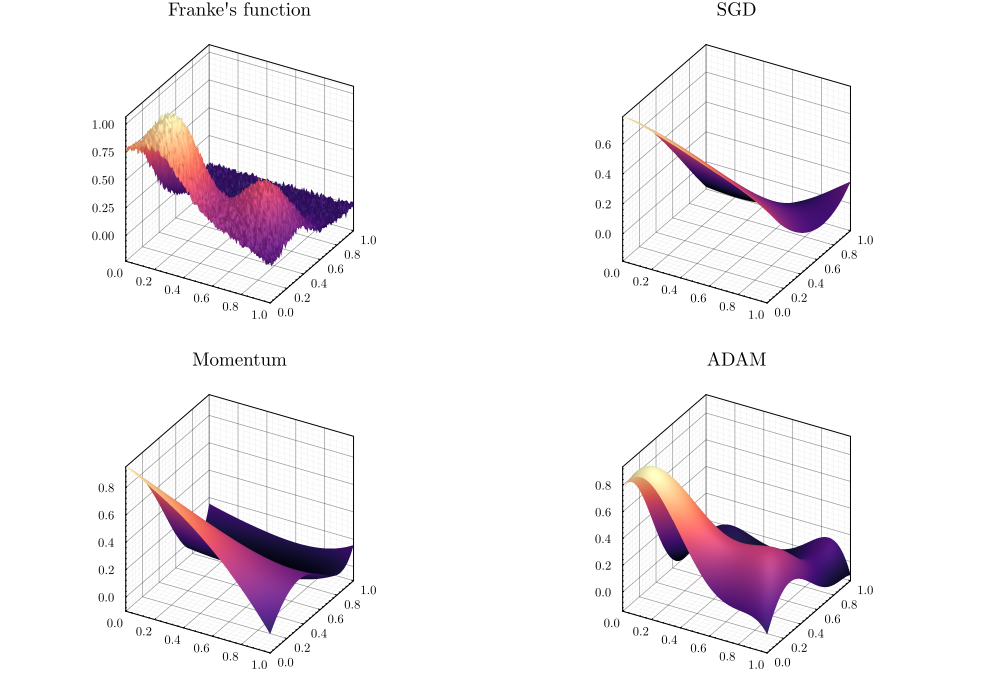

In [27]:
#X and Y range
X = range(0,1,100) |> collect 
Y = range(0,1,100) |> collect

Random.seed!(123)
ϵ=Normal(0, 0.02) # Noise
Z = Franke.(X',Y) .+ rand(ϵ,(100,100)) #Finding Z values
surf = surface(X,Y,Z, layout = (2,2),size=(1000,700),title="Franke's function",cbar=false)
#surface!(surf,subplot=1,X,Y,reshape(estADAM, (100,100)), cbar=false, title="ADAM")
surface!(surf,subplot=2,X,Y,reshape(estSGD, (100,100)), cbar=false, title="SGD")
surface!(surf,subplot=3,X,Y,reshape(estMomentum, (100,100)), cbar=false, title="Momentum")
surface!(surf,subplot=4,X,Y,reshape(estADAM, (100,100)), cbar=false, title="ADAM")
display(surf)